# Лабораторная № 8
Прокопенко Тимофей, АСОБД, timophej3@gmail.com

### № 10.1.3

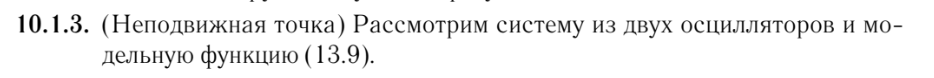

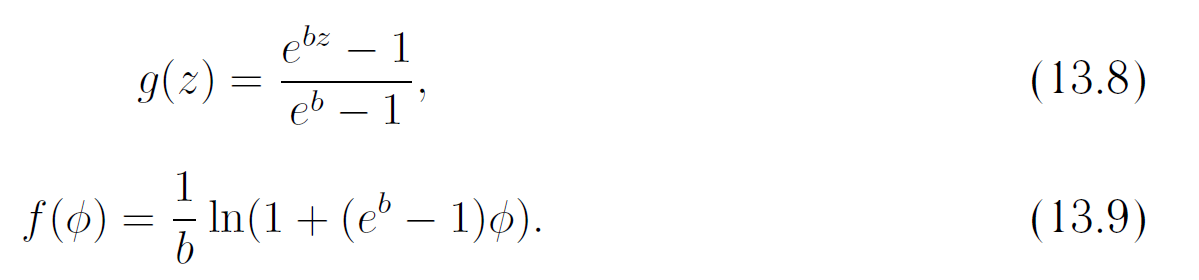

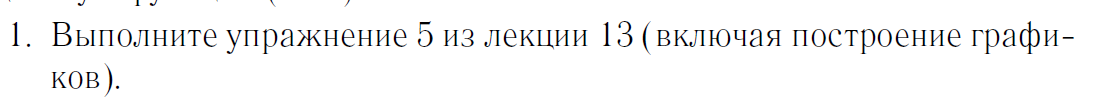

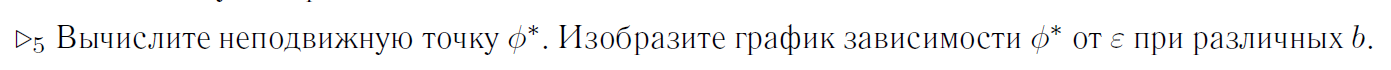

## Решение:
Для нахождения неподвижной точки нужно решить уравнение h($\phi^*$)=$\phi^*$, где h($\phi$)=g(f(1-$\phi$)+$\epsilon$).

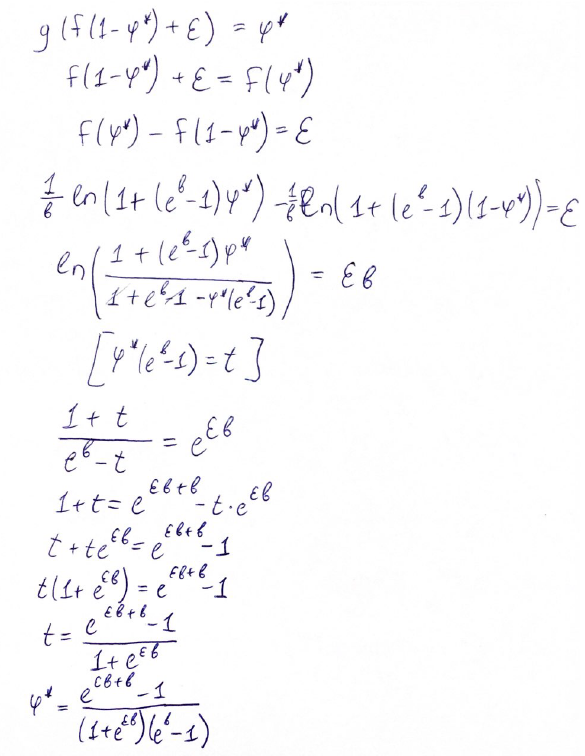

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
def get_static_point(eps, b):
    return (np.exp(eps * b + b) - 1) / ((1 + np.exp(eps * b)) * (np.exp(b) - 1))

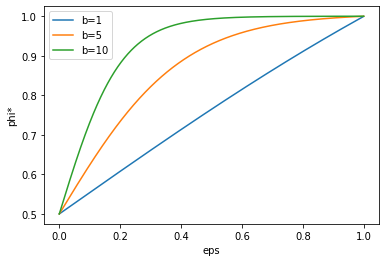

In [106]:
epsilons = np.arange(0, 1, 0.001)
plt.plot(epsilons, [get_static_point(eps, 1) for eps in epsilons], label="b=1")
plt.plot(epsilons, [get_static_point(eps, 5) for eps in epsilons ], label="b=5")
plt.plot(epsilons, [get_static_point(eps, 10) for eps in epsilons ], label="b=10")
plt.legend()
plt.xlabel("eps")
plt.ylabel("phi*")
plt.show()

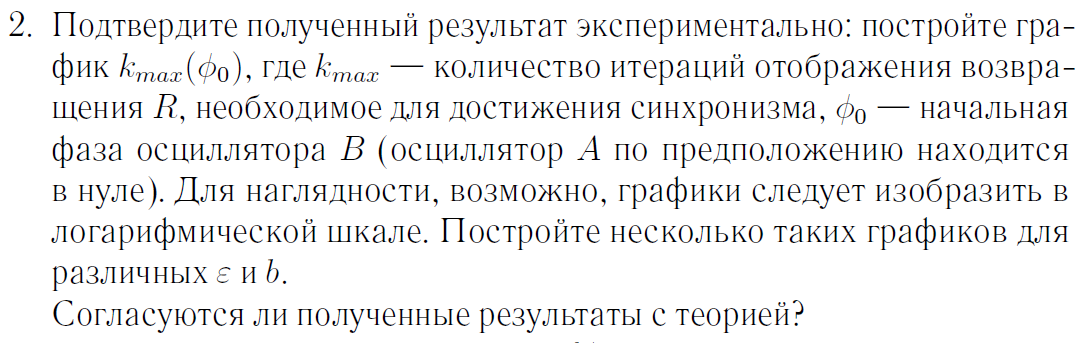

In [78]:
def f(fi, b):
    return (1 / b) * np.log(1 + (np.exp(b) - 1) * fi)

def g(z, b):
    return (np.exp(b * z) - 1) / (np.exp(b) - 1)

In [87]:
def simulation(func, inv_func, init_phase, eps, step=0.01):
    r_count = 0
    state = init_phase
    time = 0
    
    while not np.all(state == 0):
        state = state + min(1.0, min(step, np.min(1 - state)))
        time += min(step, np.min(1 - state))
        values = func(state)
        
        impulse = eps * (values >= 1).sum()
        new_values = values + impulse
        state = inv_func(new_values)
        state[new_values >= 1] = 0
        if state[0] == 0:
            r_count+=1;
            
    return r_count;

In [121]:
fi_vector = np.arange(0.001, 1, 0.001)

def get_r_vector(eps, b, fun=f, inv_fun=g, fi_vector=fi_vector):
    return [simulation(
        func=lambda x: fun(x, b),
        inv_func=lambda x: inv_fun(x, b),
        init_phase=np.array([0, fiB]),
        eps=eps,
        step=0.01) for fiB in fi_vector]

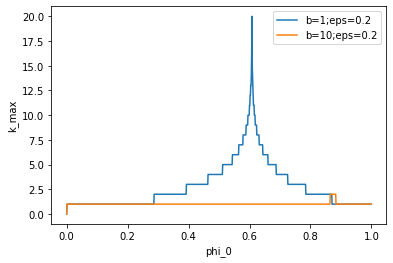

In [108]:
plt.plot(fi_vector, get_r_vector(eps=0.2, b=1), label="b=1;eps=0.2")
plt.plot(fi_vector, get_r_vector(eps=0.2, b=10), label="b=10;eps=0.2")
plt.legend()
plt.xlabel("phi_0")
plt.ylabel("k_max")
plt.show()

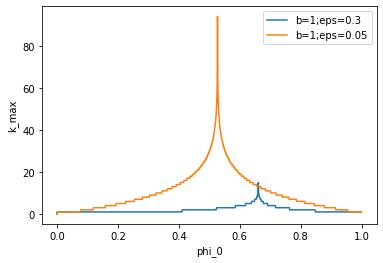

In [110]:
plt.plot(fi_vector, get_r_vector(eps=0.3, b=1), label="b=1;eps=0.3")
plt.plot(fi_vector, get_r_vector(eps=0.05, b=1), label="b=1;eps=0.05")

plt.legend()
plt.xlabel("phi_0")
plt.ylabel("k_max")
plt.show()

Как видим, у каждого графика есть ярко выраженный пик - это неподвижная точка. Все значения неподвижных точек больше 0.5, как и было показано в графике, изображенном в 1 пункте.

Проверим значения при конкретных параметрах.<br>
1) b=1, eps=0.2. По данным из первого пункта неподвижная точка будет в 0.6. Это подтвержается и графиком в пункте 2.

In [111]:
print(get_static_point(eps=0.2, b=1))

0.6078384486045795


2) b=10, eps=0.2. По данным из первого пункта неподвижная точка будет в 0.88. Это подтвержается и графиком в пункте 2.

In [113]:
print(get_static_point(eps=0.2, b=10))

0.8808316558689041


Данные результаты хорошо согласуются с теорией.
На графиках из второго пункта видно, что неподвижная точка всего одна и что она неустойчива.
По степени удаления $\phi_0$ от $\phi^*$ уменьшается количество итераций отображения возвращения до наступления синхронизации. Также можно заметить, что при бОльших b функция увеличивается с экспоненциальной скоростью, поэтому синхронизация наступает почти сразу. БОльшие значения $\epsilon$ также ускоряют процесс схождения.

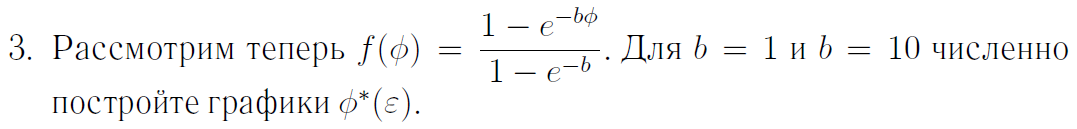

In [139]:
def f_2(fi, b):
    return (1 - np.exp(-b * fi)) / (1 - np.exp(-b))

In [140]:
def g_2(fi, b):
    return (np.log(1 + (np.exp(-b) - 1) * fi)) / (-b)

In [180]:
phi_values = np.arange(0.5, 0.999, 0.001)

def get_intersection_point(eps, b):
    f_values = np.asarray([f_2(fi,b) for fi in phi_values])
    another_f_values = np.asarray([f_2(1-fi,b)+eps for fi in phi_values])
    idx = np.argwhere(np.diff(np.sign(f_values - another_f_values))).flatten()
    return phi_values[idx[0]]

In [194]:
epsilons = np.arange(0.001, 0.9, 0.001)

y_values_b1 = np.asarray([get_intersection_point(eps, 1) for eps in epsilons])
y_values_b10 = np.asarray([get_intersection_point(eps, 10) for eps in epsilons])

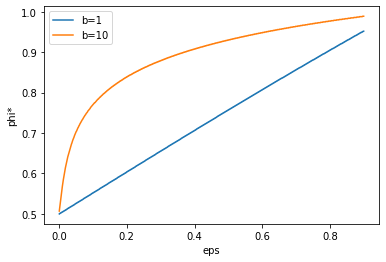

In [195]:
plt.plot(epsilons, y_values_b1, label="b=1")
plt.plot(epsilons, y_values_b10, label="b=10")
plt.legend()
plt.xlabel("eps")
plt.ylabel("phi*")
plt.show()

In [203]:
def get_static_point_2(eps):
    dict_b1 = dict(zip(epsilons, y_values_b1))
    dict_b10 = dict(zip(epsilons, y_values_b10))

    print(f"Phi_0 for b=1: {dict_b1[eps]}.")
    print(f"Phi_0 for b=10: {dict_b10[eps]}.")

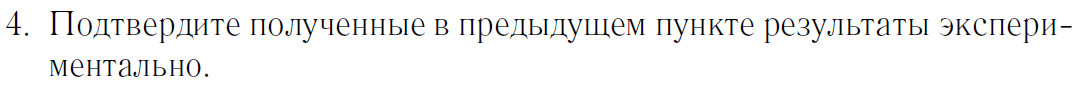

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


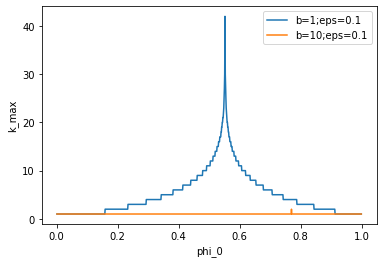

In [189]:
plt.plot(fi_vector, get_r_vector(eps=0.1, b=1, fun=f_2, inv_fun=g_2), label="b=1;eps=0.1")
plt.plot(fi_vector, get_r_vector(eps=0.1, b=10, fun=f_2, inv_fun=g_2), label="b=10;eps=0.1")
plt.legend()
plt.xlabel("phi_0")
plt.ylabel("k_max")
plt.show()

In [205]:
get_static_point_2(eps=0.1)

Phi_0 for b=1: 0.552.
Phi_0 for b=10: 0.7700000000000002.


Как видно, экспериментальные результаты подтвердили значения, полученные на графике из пункта 3.